# Contents
- Import Libraries
- Data Cleaning
- Exploratory Data Analysis
- Data preparation for regression analysis
- Regression Analysis



In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
df_bank = pd.read_csv(r"C:\Users\Home\Desktop\Career Foundry- Data Analyst.2\Task Submissions\Task excercise 6-Final\Bank Customer Churn Prediction_updated.csv")

In [5]:
df_bank.head(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Cleaning 

In [6]:
df_bank.drop('customer_id', axis=1, inplace=True)

In [7]:
df_bank.head(5)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df_bank.shape

(10000, 11)

In [9]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


# Exploratory Data Analysis

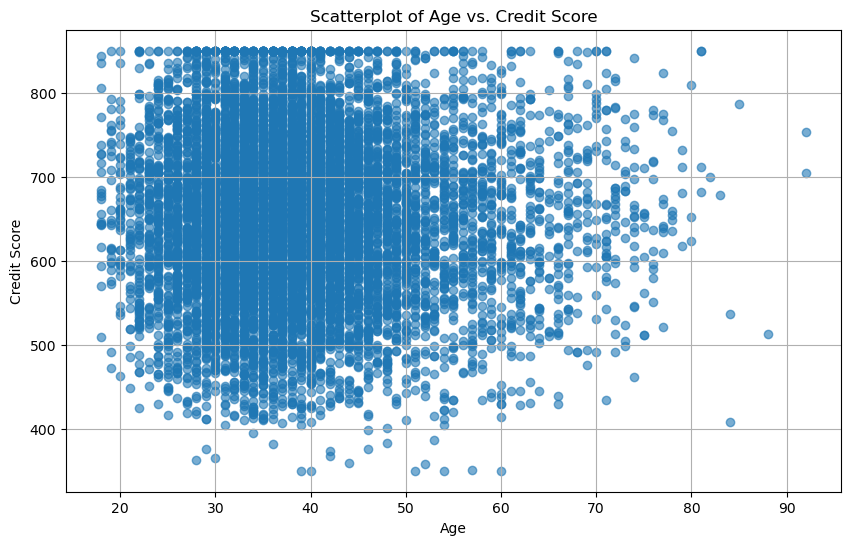

In [11]:
# Scatterplot of Age vs Credit Score
plt.figure(figsize=(10, 6))
plt.scatter(df_bank['age'], df_bank['credit_score'], alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.title('Scatterplot of Age vs. Credit Score')
plt.grid(True)
plt.show()

The scatter plot shows no strong link between age and credit score. The data points are spread out across both age and credit scores. Most points are in the middle age and credit score ranges, meaning people of these ages have various credit scores. There are fewer points for older people, but they also have a wide range of credit scores.

# Preparing data for regression analysis

In [13]:
# Encode Categorical Variables
df_bank = pd.get_dummies(df_bank, columns=['country', 'gender'], drop_first=True)


In [20]:
scaler = StandardScaler()
columns_to_scale = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
df_bank[columns_to_scale] = scaler.fit_transform(df_bank[columns_to_scale])

In [21]:
X = df_bank.drop(['churn'], axis=1)
y = df_bank['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression Analysis

In [24]:
# Logistic Regression Analysis
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)


In [68]:
# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [67]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print(class_report)


Accuracy: 0.8115
Confusion Matrix:
[[1544   63]
 [ 314   79]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



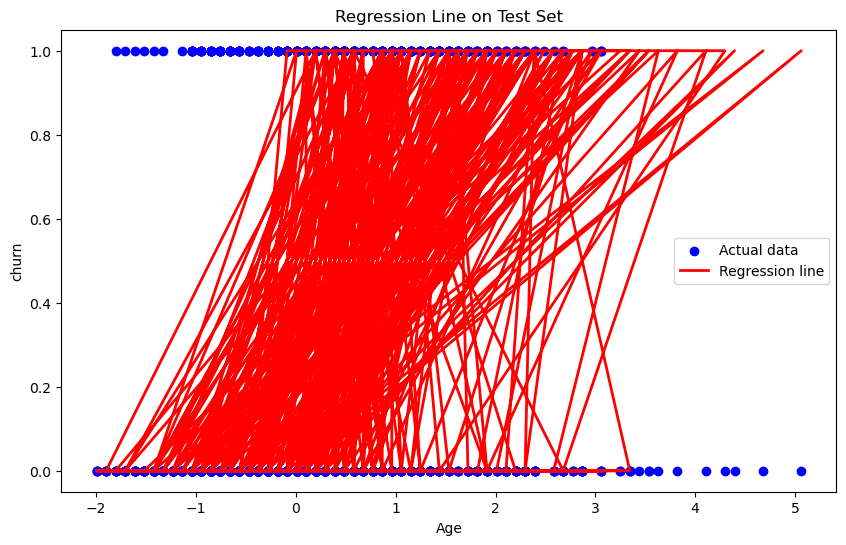

In [61]:
#Visualing
plt.figure(figsize=(10, 6))
plt.scatter(X_test['age'], y_test, color='blue', label='Actual data')
plt.plot(X_test['age'], y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Age')
plt.ylabel('churn')
plt.title('Regression Line on Test Set')
plt.legend()
plt.show()

The graph shows that the model has trouble predicting customer churn based on age. The red lines, which represent predictions, crisscross a lot, and the blue dots, showing actual data, are spread out. This suggests the model hasn't effectively learned from the data. The predictions don't match the actual data well, indicating the model isn't performing well on this test set.

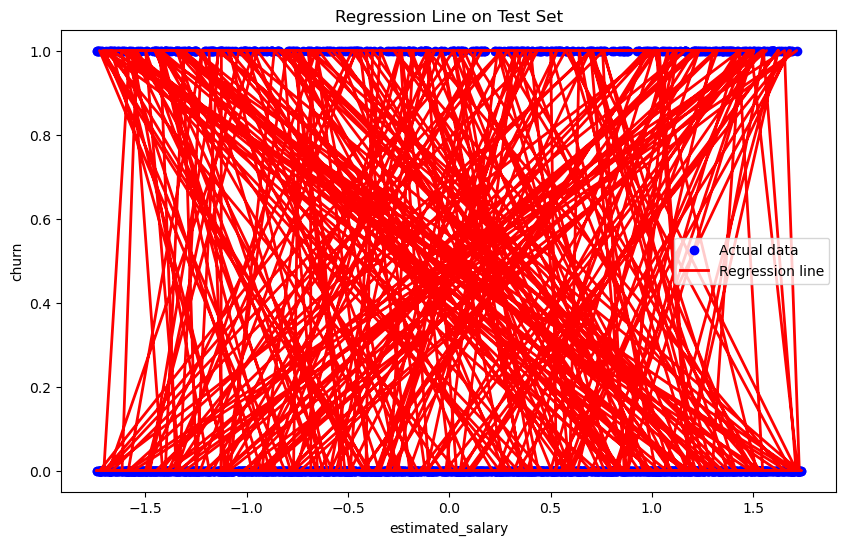

In [38]:
#Visualizing 
plt.figure(figsize=(10, 6))
plt.scatter(X_test['estimated_salary'], y_test, color='blue', label='Actual data')
plt.plot(X_test['estimated_salary'], y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('estimated_salary')
plt.ylabel('churn')
plt.title('Regression Line on Test Set')
plt.legend()
plt.show()

The graph shows that the model isn't accurately predicting customer churn based on estimated salary. The red prediction lines are very erratic and don't match well with the actual data points (blue dots). This means the model is having trouble understanding the relationship between estimated salary and churn, leading to poor performance. 

# Dividing the Data into Training and Testing Sets

In [43]:
# 80% training, 20% test
print(f'Training set size: {X_train.shape}')
print(f'Testing set size: {X_test.shape}')

Training set size: (8000, 11)
Testing set size: (2000, 11)


# Calculating MSE and R2 score.

In [44]:
#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [45]:
# Print MSE and R2
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.1885
R^2 Score: -0.1938861627960371


In [49]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)  # Using all features for training

LogisticRegression()

In [50]:
# Predict and evaluate the model
y_pred = logistic_model.predict(X_test)
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]

# Visualizaing the Result

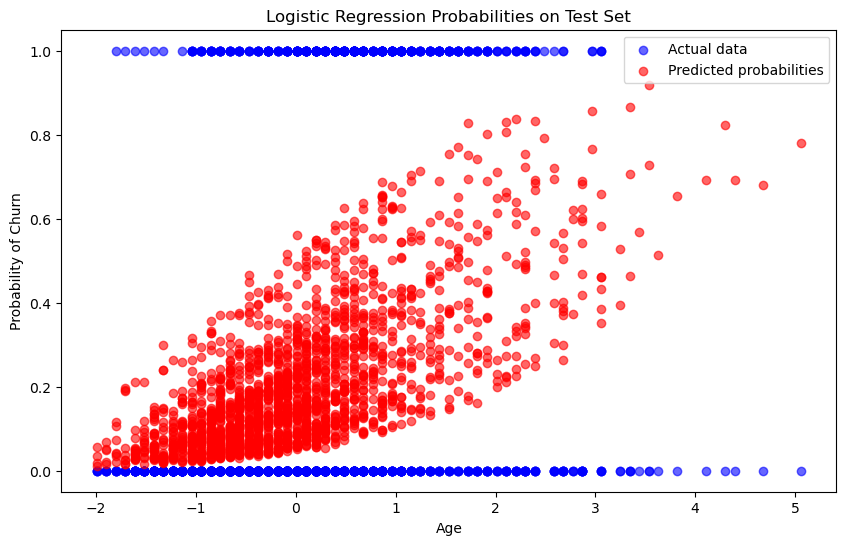

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['age'], y_test, color='blue', label='Actual data', alpha=0.6)
plt.scatter(X_test['age'], y_pred_prob, color='red', label='Predicted probabilities', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Probability of Churn')
plt.title('Logistic Regression Probabilities on Test Set')
plt.legend()
plt.show()

**Interpretation**:

The plot displays actual churn (blue points) and the predicted likelihood of churn (red points) from the logistic regression model. Generally, the model's predictions align well with the actual data, where higher probabilities indicate churn and lower probabilities indicate no churn. However, there is some overlap in the middle that suggest uncertainty. While age impacts churn likelihood, other factors also significantly influence the predictions. 

In [55]:
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 0.1885
R² Score: -0.1938861627960371


In [57]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Predicted_Probability': y_pred_prob
})

comparison_df.reset_index(drop=True, inplace=True)

print(comparison_df.head())

   Actual  Predicted  Predicted_Probability
0       0          0               0.232424
1       0          0               0.077470
2       0          0               0.315234
3       0          0               0.434639
4       0          0               0.067212




**Include your thoughts on how well the model performed on the test set in a markdown cell.
Include any reflections you have on the impact of possible data bias**.

The logistic regression model is not performing well on the test set, as shown by the negative R² Score. This score suggests the model does worse than a simple average prediction of churn rates. While the Mean Squared Error (MSE) indicates only moderate errors between the model's predictions and actual results, the concerning negative R² Score points to a need for improving the model. If the training data does not fully represent all customer groups, the model's predictions might not apply well to the entire customer base. This mismatch can result in poor model performance on a test set that is more diverse than the training set.







